In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import logsumexp
from matplotlib import cm
import arviz as az
import pymc as pm

# Assignment: Babies

In [2]:
babies = pd.read_csv('babies_month_length.csv')

In [3]:
month_obs = babies["Month"].values # x variable
length_obs = babies["Length"].values # y variable

## Problem and data

The length of human babies $y$ increases with the month from birth $x$ of the baby. For simplicity, we hypothize a *linear* dependency between $x$ and $y$, see scatterplot below.

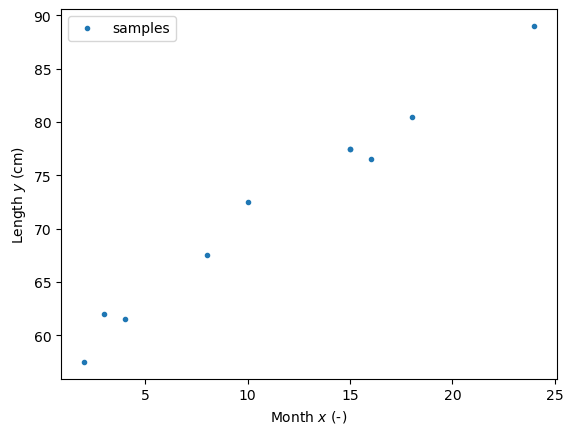

In [4]:
fig, ax = plt.subplots()
ax.plot(babies["Month"], babies["Length"], 'C0.', alpha=1.0, label="samples")
#ax.plot(0, alpha, "r*", label="alpha")
ax.set_ylabel("Length $y$ (cm)")
ax.set_xlabel("Month $x$ (-)")
plt.legend();

While the linear hypotesis seems reasonable, the points do not lie exactly on a line. In order to better characterize the data, we introduce the following probabilistic assumptions:



1. The average of the baby length $y_{\mu}$ at a given month $x$ is linear with intercept and slope coefficients 
   $\alpha$ and $\beta$, respectively:  $$y_{\mu} = \alpha + \beta x$$

2. The actual baby length is Gaussian with mean $y_{\mu}$ and standard deviation $\sigma$
3. The prior probability of $\beta$ is Gaussian with mean $0$ and standard deviation $\sigma_\beta=0.5$
4. The prior probability of $\sigma$ is a Half-Normal with standard deviation $\sigma_\sigma=1.0$
5. The intercept coefficient $\alpha$ is considered known and equal to $55.0$
6. The probabilities of the different observations are independent of each other, given  $\beta, \sigma$


Note: Condition 5 is rather artificial. It has been introduced here to limit the number of random variables and allow implementation of different approximate inference techniques.

In [5]:
# Probabilistic model constants
alpha = 55.0
sigma_sigma = 1.0
sigma_beta = 0.5

## 1.1: Probabilistic model

* Derive and comment the full probabilistic model.

## 1.2: Maximum Likelihood estimation 


* Derive an analytical expression of the likelihood function $\mathcal{L}(\beta, \sigma) = f(y|\beta, \sigma)$.

* Derive an analytical expression of the log-likelihood function $\ell(\beta, \sigma) = \log f(y|\beta, \sigma)$.

* Write a Python function corresponding to the log-likelihood function $\ell(\beta, \sigma)$. You may ignore additive factors which do not depend on $\beta, \sigma$.

* Visualize the log-likelihood function $\ell(\beta, \sigma)$ in 2D

Hint: good ranges for visualizations are defined in the code below:

In [6]:
dbeta = 0.005
dsigma = 0.005
b_min, b_max = 1.2, 1.7
s_min, s_max = 0.7, 4.0
BETA = np.arange(b_min, b_max, dbeta)
SIGMA = np.arange(s_min, s_max, dsigma)

* Obtain the maximum likelihood estimate $\beta^{\rm ml}, \sigma^{\rm ml}$

Hint: choose a good point to initialize the optimization

* Visualize the log-likelihood together with the maximum likelihood estimate

* Visualize the *likelihood* function $\mathcal{L}(\sigma, \beta)$ in 2D up to a multiplicative constant

## 1.2: Maximum A Posteriori Estimation

* Derive an analytical expression of the posterior $f(\theta | y)$, up to a *multiplicative* factor that does not depend on $\beta, \sigma$. 

Hints: 

1. Exploit the already-obtained likelihood and the functional form of the Gaussian pdf.
2. You may look up the probability density function (pdf) of the Half-Normal on [wikipedia](https://en.wikipedia.org/wiki/Half-normal_distribution).

* Derive an analytical expression of the log-posterior $\log f(\theta | y)$, up to an *additive* factor that does not depend on $\beta, \sigma$. 


* Write the log-posterior (up to an additive factor) as Python functions.

* Compute the maximum a posteriore estimate $\beta^{\rm MAP}, \sigma^{\rm MAP}$.

* Visualize the MAP estimate together with the log-posterior in 2D. Comment the results.

## 1.3 Gridding (aka brute-force) posterior estimation

* Compute a gridding approximation of the *normalized* posterior, with the correct normalization constant. Explain the passages.

* Visualize the *normalized* posterior, together with the ML and MAP estimates

* Using the grid-based approximation of the posterior, compute the posterior mean of $\beta$ and $\sigma$.

This is yet another meaningful point estimate of the latent variables $\beta, \sigma$ 

## 1.4 Monte-carlo estimation

* Obtain a sample-based approximation of the posterior $f(\beta, \sigma | y)$ using pymc.

* Obtain a sample-based approximation of the posterior $f(\beta, \sigma | y)$ by implementing the Metropolis algorithm from scratch.

* Compare the posterior estimation results obtained with the different techniques (gridding, pymc, Metropolis) and comment the results.